I'm new to Machine Learning, therefore any inputs or suggestions would be very helpful for me.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
iris = pd.read_csv('../input/Iris.csv')

iris.head()# have a look at the dataset itself

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


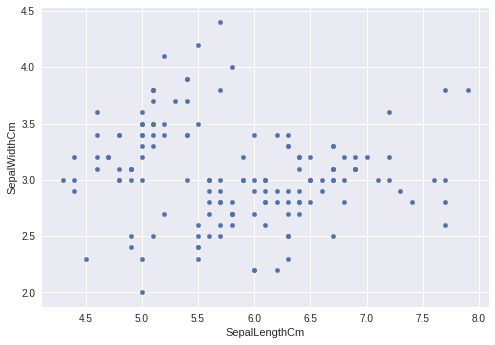

In [3]:
#AT FIRST WE WILL DO SOME VISUALISTAION OF THE DATASET ITSELF
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

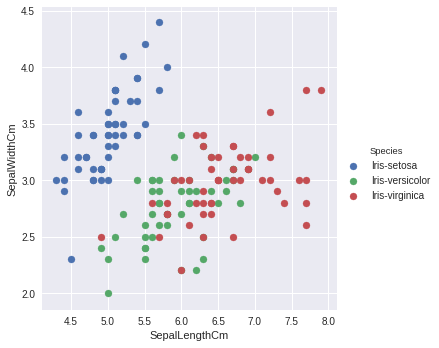

In [4]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

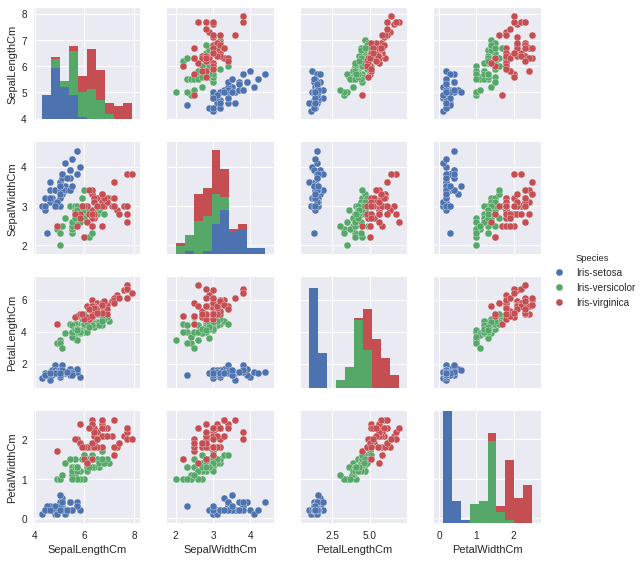

In [5]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=2)

In [6]:
#We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
# shape
print("Shape is " , iris.shape)
#Statistical Summary
print(iris.describe())

# class distribution
iris["Species"].value_counts()


Shape is  (150, 6)
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
# Split-out validation dataset
array = iris.values
X = array[:,1:4]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

In [8]:
'''
Let’s evaluate 6 different algorithms:
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
'''
# Spot Check Algorithms
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name,model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train , cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)       
        

LR: 0.908333 (0.078617)
LDA: 0.966667 (0.055277)
KNN: 0.975000 (0.038188)
CART: 0.958333 (0.041667)
NB: 0.900000 (0.050000)
SVM: 0.975000 (0.038188)


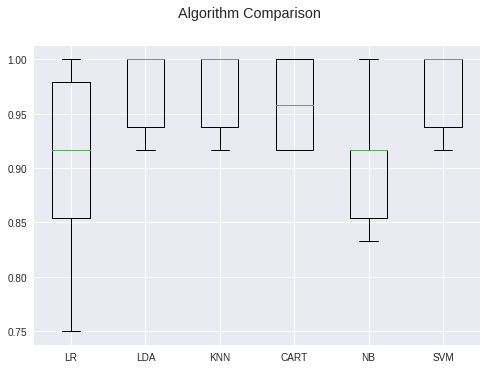

In [9]:
#We can see that it looks like KNN has the largest estimated accuracy score.
#We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model.
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [10]:
#Make Predictions
#The KNN algorithm was one of the most accurate model that we tested. 
#Now we want to get an idea of the accuracy of the model on our validation set.
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
'''
We can see that the accuracy is 0.866667 or ~87%. 
The confusion matrix provides an indication of the errors made. 
Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).
'''



0.866666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.87      0.87      0.87        30



'\nWe can see that the accuracy is 0.866667 or ~87%. \nThe confusion matrix provides an indication of the errors made. \nFinally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).\n'